In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import spearmanr

In [ ]:
hours_ds = pd.read_csv('hour.csv')
hours_ds.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hours_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hours_ds_copy = hours_ds.copy()
cdf = hours_ds_copy.drop('dteday', axis= 1)
cdf.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
corr, _= spearmanr(cdf)
for column, corr in zip(cdf.columns, corr[-1]):
    print(f'{column}: {corr:.4f}')

instant: 0.2437
season: 0.1852
yr: 0.2075
mnth: 0.1259
hr: 0.5109
holiday: -0.0295
weekday: 0.0303
workingday: 0.0210
weathersit: -0.1263
temp: 0.4233
atemp: 0.4233
hum: -0.3596
windspeed: 0.1266
casual: 0.8505
registered: 0.9894
cnt: 1.0000


In [122]:
most_corr_features = hours_ds_copy[['registered', 'casual', 'hr', 'temp', 'cnt']]

In [224]:
train_x_full, test_x, train_y_full, test_y = train_test_split(most_corr_features.iloc[:, :4], most_corr_features.cnt, test_size= 0.2, random_state= 42)
train_x, x_val, train_y, y_val = train_test_split(train_x_full, train_y_full, test_size= 0.2, random_state= 42)

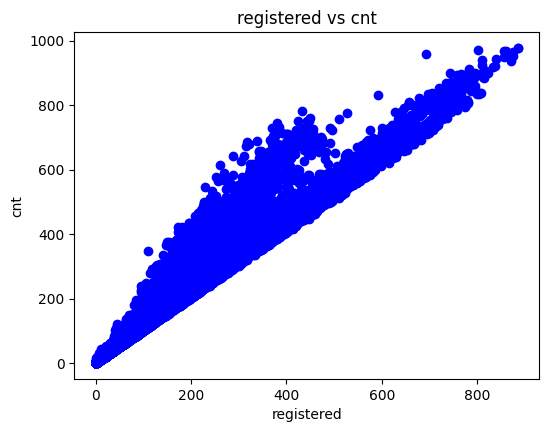

In [192]:
plt.figure(figsize= (6, 4.5))
plt.scatter(x= most_corr_features.registered, y= most_corr_features.cnt, color= 'blue')
plt.xlabel('registered')
plt.ylabel('cnt')
plt.title('registered vs cnt')
plt.show()

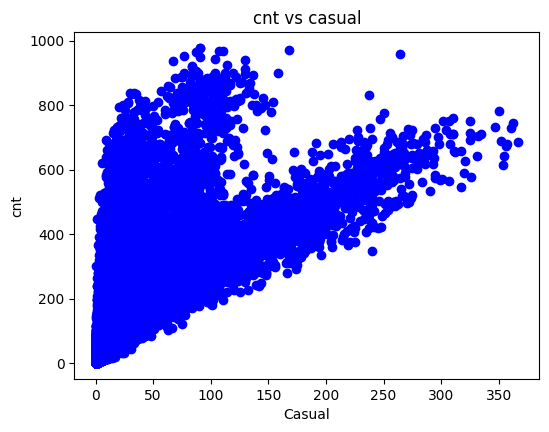

In [194]:
plt.figure(figsize= (6, 4.5))
plt.scatter(x= most_corr_features.casual, y= most_corr_features.cnt, color= 'blue')
plt.xlabel('Casual')
plt.ylabel('cnt')
plt.title('cnt vs casual')
plt.show()

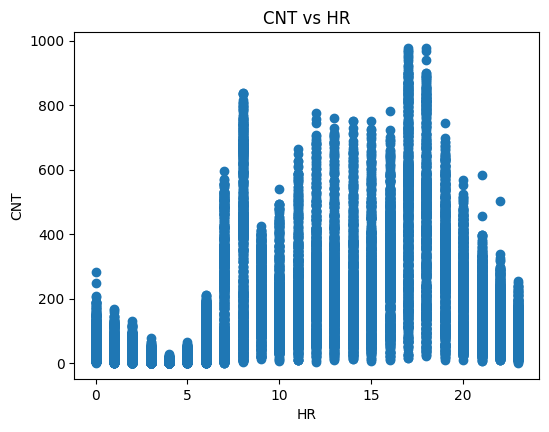

In [196]:
plt.figure(figsize= (6, 4.5))
plt.scatter(x= most_corr_features.hr, y= most_corr_features.cnt)
plt.xlabel('HR')
plt.ylabel('CNT')
plt.title('CNT vs HR')
plt.show()

In [198]:
most_corr_features['hr'].describe()

count    17379.000000
mean        11.546752
std          6.914405
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hr, dtype: float64

## Test Polynomial model

In [170]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 3, include_bias= False)

In [172]:
train_x_array = np.asanyarray(train_x_full[['hr']])
train_y_array = np.asanyarray(train_y_full)

In [178]:
train_x_poly= poly.fit_transform(train_x_array, train_y_array)
print(poly.get_feature_names_out())

['x0' 'x0^2' 'x0^3']


In [180]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(train_x_poly, train_y_array)
print(regr.coef_)
print(regr.intercept_)

[-9.2865529   4.69157708 -0.18274547]
31.125566478144833


In [78]:
for coef, name in zip(regr.coef_, poly.get_feature_names_out()):
    print(f'{coef:.4f}{name}', end= '   ')

-9.2866x0   4.6916x0^2   -0.1827x0^3   

In [182]:
x0 = np.arange(0, 24)
yy = regr.intercept_ + regr.coef_[0] * x0 + regr.coef_[1] * np.power(x0, 2) + regr.coef_[2] * np.power(x0, 3)

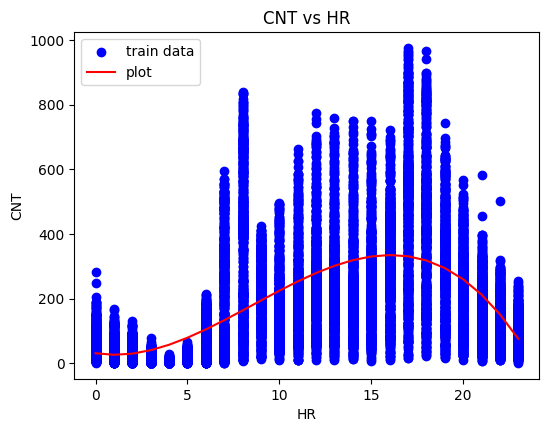

In [184]:
plt.figure(figsize= (6, 4.5))
plt.scatter(x= train_x_full.hr, y= train_y_full, color= 'blue')
plt.plot(x0, yy, color= 'red')
plt.xlabel('HR')
plt.ylabel('CNT')
plt.title('CNT vs HR')
plt.legend(['train data', 'plot'])
plt.show()

In [186]:
test_x_array = np.asanyarray(test_x[['hr']])
test_y_array = np.asanyarray(test_y)
test_x_poly = poly.fit_transform(test_x_array, test_y_array)
y_hat = regr.predict(test_x_poly)

## Not good predict with polynomial

In [99]:
from sklearn.metrics import r2_score
print(r2_score(test_y, y_hat))

0.37274801818948733


## LightGBM Model

In [226]:
from lightgbm import LGBMRegressor, early_stopping
model = LGBMRegressor(subsample= 0.8,
                      colsample_bytree= 0.5,
                      boosting_type= 'gbdt',
                      random_state= 42)

In [228]:
params= {
    'n_estimators': [500, 1000],
    'learning_rate': [0.005, 0.001, 0.05, 0.01],
    'max_depth': [8, 9],
    'num_leaves': [100, 128, 256, 512],
    'min_child_samples': [87, 90, 100, 200, 300],
    'feature_fraction': [0.8],
    'bagging_fraction': [0.7],
    'bagging_freq': [2, 3]
}

In [230]:
grid = GridSearchCV(model,
                   param_grid= params,
                   cv= 3,
                   verbose= 2,
                   n_jobs= -1)

In [232]:
grid.fit(train_x, train_y,
         eval_set= [(x_val, y_val)],
         eval_metric= 'rmse',
         callbacks= [early_stopping(stopping_rounds= 30)])

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


C:\Users\ExoGame\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 581
[LightGBM] [Info] Number of data points in the train set: 11122, number of used features: 4
[LightGBM] [War

GridSearchCV(cv=3,
             estimator=LGBMRegressor(colsample_bytree=0.5, random_state=42,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.7], 'bagging_freq': [2, 3],
                         'feature_fraction': [0.8],
                         'learning_rate': [0.005, 0.001, 0.05, 0.01],
                         'max_depth': [8, 9],
                         'min_child_samples': [87, 90, 100, 200, 300],
                         'n_estimators': [500, 1000],
                         'num_leaves': [100, 128, 256, 512]},
             verbose=2)

In [236]:
print(grid.best_estimator_)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=2, colsample_bytree=0.5,
              feature_fraction=0.8, learning_rate=0.05, max_depth=9,
              min_child_samples=87, n_estimators=1000, num_leaves=100,
              random_state=42, subsample=0.8)


In [238]:
main_model = grid.best_estimator_

In [240]:
test_y_hat= main_model.predict(test_x)
train_y_hat = main_model.predict(train_x_full)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [244]:
from sklearn.metrics import r2_score
print(f'Check train Predict for overfitting and underfitting: {r2_score(train_y_full, train_y_hat):.5f}')
print(f'Result: {r2_score(test_y, test_y_hat):.5f}')

Check train Predict for overfitting and underfitting: 0.99908
Result: 0.99900
